## Try to replicate Figure 3

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb
# NOTE: change relu_k to = 1000 when running!

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
if 0:
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=False,  # Deviates from paper.
                          update_all_edges=True)  # Deviates from paper.
else:
    # Same as paper.
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=True,
                          update_all_edges=False)

# Feed-forward brain config.
n_up = 10  # Unknown in paper.
n_down = 28 * 28
m_up = 2  # Unknown in paper.
m_down = 10
p = 0.5

# Training config.
num_runs = 5
num_rule_epochs = 50
num_epochs_upstream = 1
num_epochs_downstream = 1
downstream_backprop = False
dataset_up = 'relu'  # In paper: T=1 is halfspace, T=3 is relu
dataset_down = 'mnist'
relu_k = 1000

## In this notebook: Transfer rules, correct dimensionality everywhere, !disable! backprop downstream

In [3]:
# Instantiate brain factories.
# NOTE: Large networks (|V| = 1000) only exist downstream.
brain_v100_t1_up_fact = lambda: LocalNet(n_up, m_up, 100, p, 50, 0, options=opts_up, update_scheme=scheme)
brain_v100_t3_up_fact = lambda: LocalNet(n_up, m_up, 100, p, 50, 2, options=opts_up, update_scheme=scheme)
brain_v100_t1_down_fact = lambda: LocalNet(n_down, m_down, 100, p, 50, 0, options=opts_down, update_scheme=scheme)
brain_v100_t3_down_fact = lambda: LocalNet(n_down, m_down, 100, p, 50, 2, options=opts_down, update_scheme=scheme)
brain_v1000_t1_down_fact = lambda: LocalNet(n_down, m_down, 1000, p, 500, 0, options=opts_down, update_scheme=scheme)
brain_v1000_t3_down_fact = lambda: LocalNet(n_down, m_down, 1000, p, 500, 2, options=opts_down, update_scheme=scheme)

In [ ]:
# Evaluate models.
print('=====> v100_t1')
stats_v100_t1_up, stats_v100_t1_down = evaluate_up_down(
    brain_v100_t1_up_fact, brain_v100_t1_down_fact,
    n_up, n_down, dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream, relu_k=relu_k)
print('=====> v100_t3')
stats_v100_t3_up, stats_v100_t3_down = evaluate_up_down(
    brain_v100_t3_up_fact, brain_v100_t3_down_fact,
    n_up, n_down, dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream, relu_k=relu_k)
print('=====> v1000_t1')
stats_v1000_t1_up, stats_v1000_t1_down = evaluate_up_down(
    brain_v100_t1_up_fact, brain_v1000_t1_down_fact,
    n_up, n_down, dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream, relu_k=relu_k)
print('=====> v1000_t3')
stats_v1000_t3_up, stats_v1000_t3_down = evaluate_up_down(
    brain_v100_t3_up_fact, brain_v1000_t3_down_fact,
    n_up, n_down, dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream, relu_k=relu_k)

  0%|          | 0/50 [00:00<?, ?it/s]

=====> v100_t1

Run 1 / 5...
Count of 0: 3329  Count of 1: 2671
Meta-learning on relu...


100%|██████████| 50/50 [00:45<00:00,  1.11it/s]
../LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()


Last loss: 0.6927
Last train accuracy: 0.7700
Last test accuracy: 0.7796
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.6996
Last train accuracy: 0.7841
Last test accuracy: 0.7939


Run 2 / 5...
Count of 0: 1273  Count of 1: 4727
Meta-learning on relu...


100%|██████████| 50/50 [00:48<00:00,  1.03it/s]


Last loss: 0.6925
Last train accuracy: 0.8633
Last test accuracy: 0.8702
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.7032
Last train accuracy: 0.7398
Last test accuracy: 0.7489


Run 3 / 5...
Count of 0: 4678  Count of 1: 1322
Meta-learning on relu...


100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


Last loss: 0.4776
Last train accuracy: 0.7593
Last test accuracy: 0.7864
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3778
Last train accuracy: 0.0987
Last test accuracy: 0.0980


Run 4 / 5...
Count of 0: 565  Count of 1: 5435
Meta-learning on relu...


100%|██████████| 50/50 [00:42<00:00,  1.18it/s]


Last loss: 0.6930
Last train accuracy: 0.8120
Last test accuracy: 0.8220
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.9325
Last train accuracy: 0.7466
Last test accuracy: 0.7550


Run 5 / 5...
Count of 0: 207  Count of 1: 5793
Meta-learning on relu...


100%|██████████| 50/50 [00:37<00:00,  1.33it/s]


Last loss: 0.6928
Last train accuracy: 0.9680
Last test accuracy: 0.9647
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.9109
Last train accuracy: 0.7685
Last test accuracy: 0.7787

=====> v100_t3

Run 1 / 5...
Count of 0: 440  Count of 1: 5560
Meta-learning on relu...


100%|██████████| 50/50 [01:32<00:00,  1.85s/it]


Last loss: 0.6931
Last train accuracy: 0.9327
Last test accuracy: 0.9247
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.2989
Last train accuracy: 0.1673
Last test accuracy: 0.1733


Run 2 / 5...
Count of 0: 5594  Count of 1: 406
Meta-learning on relu...


100%|██████████| 50/50 [01:33<00:00,  1.86s/it]


Last loss: 0.4555
Last train accuracy: 0.9227
Last test accuracy: 0.9356
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3645
Last train accuracy: 0.0987
Last test accuracy: 0.0980


Run 3 / 5...
Count of 0: 1089  Count of 1: 4911
Meta-learning on relu...


100%|██████████| 50/50 [01:42<00:00,  2.04s/it]


Last loss: 0.6931
Last train accuracy: 0.8273
Last test accuracy: 0.8224
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0929
INITIAL test accuracy: 0.0914
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3106
Last train accuracy: 0.0872
Last test accuracy: 0.0820


Run 4 / 5...
Count of 0: 794  Count of 1: 5206
Meta-learning on relu...


100%|██████████| 50/50 [01:41<00:00,  2.02s/it]


Last loss: 0.6931
Last train accuracy: 0.8300
Last test accuracy: 0.8258
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0895
INITIAL test accuracy: 0.0891
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.2529
Last train accuracy: 0.1605
Last test accuracy: 0.1685


Run 5 / 5...
Count of 0: 2396  Count of 1: 3604
Meta-learning on relu...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.6931
Last train accuracy: 0.6480
Last test accuracy: 0.6676
Final upstream test acc 0.6676 not high enough, retrying...
Count of 0: 909  Count of 1: 5091
Meta-learning on relu...


100%|██████████| 50/50 [01:38<00:00,  1.97s/it]


Last loss: 0.6931
Last train accuracy: 0.8087
Last test accuracy: 0.8058
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.1988
Last train accuracy: 0.5007
Last test accuracy: 0.5131

=====> v1000_t1

Run 1 / 5...
Count of 0: 3930  Count of 1: 2070
Meta-learning on relu...


100%|██████████| 50/50 [00:48<00:00,  1.03it/s]


Last loss: 0.6926
Last train accuracy: 0.7860
Last test accuracy: 0.7791
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903


  0%|          | 0/60000 [00:00<?, ?it/s]

INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.5372
Last train accuracy: 0.8473
Last test accuracy: 0.8524


Run 2 / 5...
Count of 0: 3376  Count of 1: 2624
Meta-learning on relu...


100%|██████████| 50/50 [00:45<00:00,  1.11it/s]


Last loss: 0.6925
Last train accuracy: 0.8553
Last test accuracy: 0.8624
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903


  0%|          | 0/60000 [00:00<?, ?it/s]

INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.5229
Last train accuracy: 0.8551
Last test accuracy: 0.8575


Run 3 / 5...
Count of 0: 3281  Count of 1: 2719
Meta-learning on relu...


100%|██████████| 50/50 [00:47<00:00,  1.06it/s]


Last loss: 0.6928
Last train accuracy: 0.7380
Last test accuracy: 0.7544
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903


  0%|          | 0/60000 [00:00<?, ?it/s]

INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.5197
Last train accuracy: 0.8671
Last test accuracy: 0.8674


Run 4 / 5...
Count of 0: 4428  Count of 1: 1572
Meta-learning on relu...


100%|██████████| 50/50 [00:45<00:00,  1.10it/s]


Last loss: 0.5045
Last train accuracy: 0.7440
Last test accuracy: 0.7360
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3812
Last train accuracy: 0.0987
Last test accuracy: 0.0980


Run 5 / 5...
Count of 0: 2864  Count of 1: 3136
Meta-learning on relu...


100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


Last loss: 0.6930
Last train accuracy: 0.7433
Last test accuracy: 0.7551
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903


  0%|          | 0/60000 [00:00<?, ?it/s]

INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.5147
Last train accuracy: 0.8566
Last test accuracy: 0.8584

=====> v1000_t3

Run 1 / 5...
Count of 0: 5022  Count of 1: 978
Meta-learning on relu...


100%|██████████| 50/50 [01:32<00:00,  1.86s/it]


Last loss: 0.4269
Last train accuracy: 0.8387
Last test accuracy: 0.8364
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0987


  0%|          | 0/60000 [00:00<?, ?it/s]

INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3545
Last train accuracy: 0.0987
Last test accuracy: 0.0980


Run 2 / 5...
Count of 0: 3158  Count of 1: 2842
Meta-learning on relu...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.5945
Last train accuracy: 0.5147
Last test accuracy: 0.5302
Final upstream test acc 0.5302 not high enough, retrying...
Count of 0: 3025  Count of 1: 2975
Meta-learning on relu...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.5628
Last train accuracy: 0.5167
Last test accuracy: 0.5000
Final upstream test acc 0.5000 not high enough, retrying...
Count of 0: 4032  Count of 1: 1968
Meta-learning on relu...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.4846
Last train accuracy: 0.6793
Last test accuracy: 0.6696
Final upstream test acc 0.6696 not high enough, retrying...
Count of 0: 2062  Count of 1: 3938
Meta-learning on relu...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.6931
Last train accuracy: 0.6507
Last test accuracy: 0.6453
Final upstream test acc 0.6453 not high enough, retrying...
Count of 0: 426  Count of 1: 5574
Meta-learning on relu...


100%|██████████| 50/50 [01:34<00:00,  1.89s/it]


Last loss: 0.6931
Last train accuracy: 0.8347
Last test accuracy: 0.8456
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0903


  0%|          | 0/60000 [00:00<?, ?it/s]

INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.5480
Last train accuracy: 0.4881
Last test accuracy: 0.4850


Run 3 / 5...
Count of 0: 3497  Count of 1: 2503
Meta-learning on relu...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.6931
Last train accuracy: 0.6060
Last test accuracy: 0.5989
Final upstream test acc 0.5989 not high enough, retrying...
Count of 0: 3188  Count of 1: 2812
Meta-learning on relu...


  0%|          | 0/50 [00:00<?, ?it/s]

Last loss: 0.6931
Last train accuracy: 0.5673
Last test accuracy: 0.5533
Final upstream test acc 0.5533 not high enough, retrying...
Count of 0: 3833  Count of 1: 2167
Meta-learning on relu...


100%|██████████| 50/50 [01:40<00:00,  2.01s/it]


Last loss: 0.5521
Last train accuracy: 0.8080
Last test accuracy: 0.8020
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0879
INITIAL test accuracy: 0.0875
Epoch 1 / 1 ...


 45%|████▌     | 27295/60000 [15:08<07:18, 74.56it/s]  

In [ ]:
# Aggregate stats.
agg_stats_v100_t1_up = convert_multi_stats_uncertainty(stats_v100_t1_up)
agg_stats_v100_t1_down = convert_multi_stats_uncertainty(stats_v100_t1_down)
agg_stats_v100_t3_up = convert_multi_stats_uncertainty(stats_v100_t3_up)
agg_stats_v100_t3_down = convert_multi_stats_uncertainty(stats_v100_t3_down)
agg_stats_v1000_t1_up = convert_multi_stats_uncertainty(stats_v1000_t1_up)
agg_stats_v1000_t1_down = convert_multi_stats_uncertainty(stats_v1000_t1_down)
agg_stats_v1000_t3_up = convert_multi_stats_uncertainty(stats_v1000_t3_up)
agg_stats_v1000_t3_down = convert_multi_stats_uncertainty(stats_v1000_t3_down)

Saving figure to: figs/rnn_mnist_relu_cmp


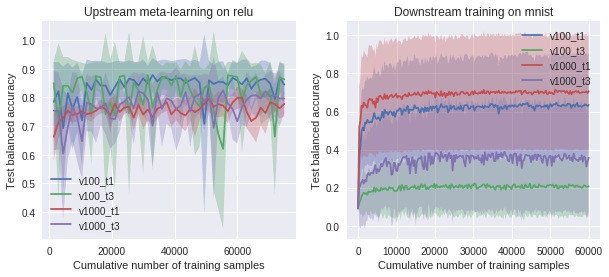

In [7]:
# Plot to compare all.
all_stats_up = [agg_stats_v100_t1_up, agg_stats_v100_t3_up, agg_stats_v1000_t1_up, agg_stats_v1000_t3_up]
all_stats_down = [agg_stats_v100_t1_down, agg_stats_v100_t3_down, agg_stats_v1000_t1_down, agg_stats_v1000_t3_down]
labels = ['v100_t1', 'v100_t3', 'v1000_t1', 'v1000_t3']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset_up,
                    'Downstream training on ' + dataset_down,
                    'figs/rnn_mnist_relu_cmp')